In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100

In [4]:
df_orig = pd.read_excel('C:/Users/Khush/Desktop/Datesets/default_of_credit_card_clients (1).xls')

In [5]:
df_zero_mask = df_orig == 0

In [6]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [7]:
sum(feature_zero_mask)

315

In [8]:
df_clean = df_orig.loc[~feature_zero_mask,:].copy()

In [9]:
df_clean.shape

(29685, 25)

In [10]:

df_clean['ID'].nunique()

29685

In [11]:
df_clean['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
5      275
4      122
6       49
0       14
Name: EDUCATION, dtype: int64

In [12]:
df_clean['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [13]:

df_clean['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
4      460
Name: EDUCATION, dtype: int64

In [14]:

df_clean['MARRIAGE'].value_counts()

2    15810
1    13503
3      318
0       54
Name: MARRIAGE, dtype: int64

In [15]:
df_clean['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [16]:
df_clean['MARRIAGE'].value_counts()

2    15810
1    13503
3      372
Name: MARRIAGE, dtype: int64

In [17]:

df_clean['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [18]:
missing_pay_1_mask = df_clean['PAY_1'] == 'Not available'

In [19]:
sum(missing_pay_1_mask)

3021

In [20]:
df_missing_pay_1 = df_clean.loc[missing_pay_1_mask,:].copy()

In [21]:

df_missing_pay_1.shape

(3021, 25)

In [22]:
df_missing_pay_1['PAY_1'].head(3)

17    Not available
28    Not available
29    Not available
Name: PAY_1, dtype: object

In [23]:
df_missing_pay_1['PAY_1'].value_counts()

Not available    3021
Name: PAY_1, dtype: int64

In [24]:
df_missing_pay_1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [28]:
df = pd.read_csv('C:/Users/Khush/Desktop/Datesets/cleaned_data.csv')

In [29]:

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [30]:
features_response = df.columns.tolist()

In [31]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [32]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:

X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)


In [35]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [36]:

df_missing_pay_1.shape

(3021, 25)

In [37]:
features_response[4]

'PAY_1'

In [38]:

np.median(X_train[:,4])

0.0

In [39]:
np.random.seed(seed=1)
fill_values = [0, np.random.choice(X_train[:,4], size=(3021,), replace=True)]

In [40]:
fill_strategy = ['mode', 'random']

In [41]:
fill_values[-1]

array([ 0,  0,  0, ...,  2,  0, -2], dtype=int64)

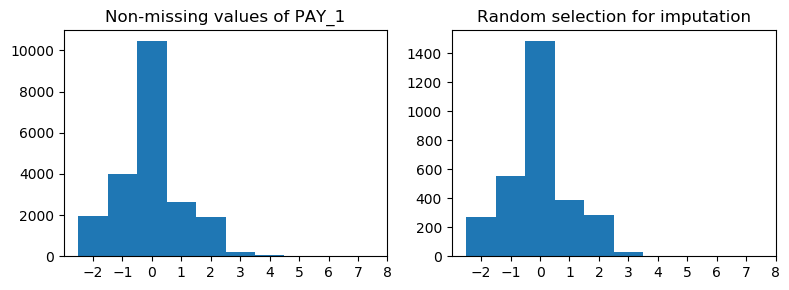

In [42]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
bin_edges = np.arange(-2,9)
axs[0].hist(X_train[:,4], bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(fill_values[-1], bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Random selection for imputation')
plt.tight_layout()

In [43]:
from sklearn.model_selection import KFold

In [44]:
k_folds = KFold(n_splits=4, shuffle=True, random_state=1)

In [45]:
from sklearn.model_selection import cross_validate

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier\
(n_estimators=200, criterion='gini', max_depth=9,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=1, warm_start=False, class_weight=None)

In [48]:
for counter in range(len(fill_values)):
    
    df_fill_pay_1_filled = df_missing_pay_1.copy()
    df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
    
    
    X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
    train_test_split(
        df_fill_pay_1_filled[features_response[:-1]].values,
        df_fill_pay_1_filled['default payment next month'].values,
    test_size=0.2, random_state=24)
    
    
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
    
    
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')
    
    test_score = imputation_compare_cv['test_score']
    print(fill_strategy[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   28.7s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   29.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


mode imputation: mean testing score 0.772866246168149, std 0.0031479941297533737


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   24.0s remaining:   24.0s


random imputation: mean testing score 0.7692540439833129, std 0.003660875187678248


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   24.3s finished


In [49]:
pay_1_df = df.copy()

In [50]:
features_for_imputation = pay_1_df.columns.tolist()

In [51]:
items_to_remove_2 = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university', 'default payment next month', 'PAY_1']

In [52]:
features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove_2]
features_for_imputation


['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [54]:
X_impute_train, X_impute_test, y_impute_train, y_impute_test = \
train_test_split(
    pay_1_df[features_for_imputation].values,
    pay_1_df['PAY_1'].values,
test_size=0.2, random_state=24)

In [55]:
rf_impute_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
cv_rf_impute = GridSearchCV(rf, param_grid=rf_impute_params, scoring='accuracy',
                            n_jobs=-1, iid=False, refit=True,
                            cv=4, verbose=2, error_score=np.nan, return_train_score=True)

In [58]:
cv_rf_impute.fit(X_impute_train, y_impute_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  2.7min finished
C:\Users\Khush\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   30.9s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=4,
                                      

In [59]:
impute_df = pd.DataFrame(cv_rf_impute.cv_results_)
impute_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.539346,0.023652,0.054688,0.007815,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.664729,0.669417,0.671479,0.664291,0.667479,0.003061,15,0.669396,0.670146,0.665146,0.670042,0.668682,0.002062
1,3.361069,0.073286,0.198978,0.004224,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.657979,0.660229,0.660604,0.651350,0.657540,0.003712,16,0.664521,0.657145,0.654082,0.660854,0.659150,0.003920
2,5.153080,0.063080,0.367005,0.004009,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.672605,0.673542,0.675792,0.667854,0.672448,0.002894,13,0.677835,0.675147,0.670521,0.676167,0.674918,0.002713
3,9.414980,0.076526,0.719415,0.009659,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.664917,0.666042,0.675792,0.666354,0.668276,0.004372,14,0.672334,0.668896,0.669021,0.672605,0.670714,0.001758
4,0.826219,0.017313,0.050779,0.006762,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.710294,0.706919,0.713482,0.700675,0.707843,0.004744,12,0.717027,0.717027,0.718465,0.711607,0.716032,0.002621
5,3.979341,0.018183,0.211055,0.009337,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.708419,0.709732,0.713107,0.703863,0.708780,0.003314,11,0.716652,0.716090,0.719777,0.715982,0.717125,0.001552
6,7.826857,0.059994,0.371503,0.009180,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.709544,0.709544,0.714420,0.705926,0.709859,0.003019,10,0.718777,0.716777,0.719152,0.718420,0.718282,0.000906
7,15.976118,0.095674,0.727499,0.020284,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.710669,0.709357,0.715170,0.705551,0.710187,0.003436,9,0.719152,0.717652,0.719715,0.718107,0.718657,0.000818
8,1.156598,0.015881,0.045080,0.008998,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.719670,0.725858,0.721920,0.720743,0.722048,0.002339,7,0.767721,0.773722,0.767221,0.771611,0.770069,0.002709
9,5.289829,0.056878,0.199827,0.016701,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.726608,0.728296,0.725858,0.731808,0.728142,0.002293,6,0.770284,0.774347,0.771471,0.770611,0.771678,0.001601


In [60]:

cv_rf_impute.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [61]:
cv_rf_impute.best_score_

0.7344242187492307

In [62]:
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()

In [63]:
pay_1_value_counts


-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [64]:
pay_1_value_counts/pay_1_value_counts.sum()

-2    0.092859
-1    0.189281
 0    0.490812
 1    0.122300
 2    0.089184
 3    0.010951
 4    0.002363
 5    0.000863
 6    0.000413
 7    0.000338
 8    0.000638
Name: PAY_1, dtype: float64

In [65]:
y_impute_predict = cv_rf_impute.predict(X_impute_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished


In [66]:
from sklearn import metrics

In [67]:

metrics.accuracy_score(y_impute_test, y_impute_predict)

0.7391711981998875

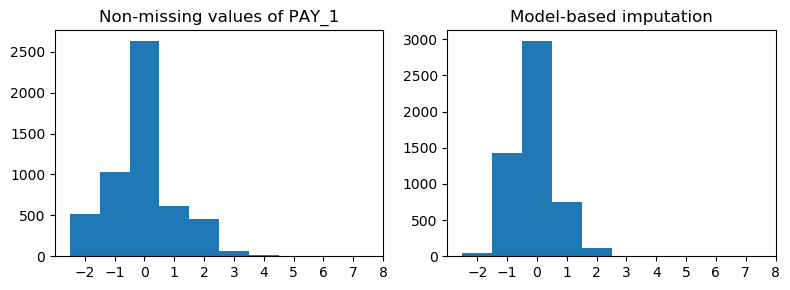

In [68]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].hist(y_impute_test, bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(y_impute_predict, bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Model-based imputation')
plt.tight_layout()

In [69]:
X_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].values

In [70]:
rf_impute = RandomForestClassifier(n_estimators=100, max_depth=12)

In [71]:

rf_impute

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
rf_impute.fit(X_impute_all, y_impute_all)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
df_fill_pay_1_model = df_missing_pay_1.copy()

In [74]:

df_fill_pay_1_model['PAY_1'].head()

17    Not available
28    Not available
29    Not available
54    Not available
60    Not available
Name: PAY_1, dtype: object

In [75]:

df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)

In [76]:
df_fill_pay_1_model['PAY_1'].head()

17    0
28   -1
29    0
54    0
60    0
Name: PAY_1, dtype: int64

In [77]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

-2      30
-1     763
 0    1715
 1     438
 2      64
 3       7
 4       2
 6       1
 8       1
Name: PAY_1, dtype: int64

In [78]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [79]:
print(X_fill_pay_1_train.shape)
print(X_fill_pay_1_test.shape)
print(y_fill_pay_1_train.shape)
print(y_fill_pay_1_test.shape)

(2416, 17)
(605, 17)
(2416,)
(605,)


In [80]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)

In [81]:

print(X_train_all.shape)
print(y_train_all.shape)

(23747, 17)
(23747,)


In [82]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [83]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   31.3s remaining:   31.3s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   31.6s finished


In [84]:
imputation_compare_cv['test_score']

array([0.76890992, 0.77309591, 0.77166336, 0.77703366])

In [85]:
np.mean(imputation_compare_cv['test_score'])

0.7726757126815554

In [86]:
np.std(imputation_compare_cv['test_score'])

0.002931480680760725

In [87]:
df_fill_pay_1_model['PAY_1'] = np.zeros_like(df_fill_pay_1_model['PAY_1'].values)

In [88]:
df_fill_pay_1_model['PAY_1'].unique()

array([0], dtype=int64)

In [89]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [90]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)

In [91]:
print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)

(23747, 17)
(5938, 17)
(23747,)
(5938,)


In [92]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   26.1s remaining:   26.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   26.5s finished


In [93]:
np.mean(imputation_compare_cv['test_score'])

0.772866246168149

In [94]:

rf.fit(X_train_all, y_train_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   27.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [95]:
y_test_all_predict_proba = rf.predict_proba(X_test_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
roc_auc_score(y_test_all, y_test_all_predict_proba[:,1])

0.7696243835824927

In [98]:
thresholds = np.linspace(0, 1, 101)

In [99]:
df[features_response[:-1]].columns[5]

'BILL_AMT1'

In [100]:
savings_per_default = np.mean(X_test_all[:, 5])
savings_per_default

51601.7433479286

In [101]:

cost_per_counseling = 7500

In [102]:
effectiveness = 0.70

In [103]:
n_pos_pred = np.empty_like(thresholds)
cost_of_all_counselings = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
savings_of_all_counselings = np.empty_like(thresholds)


In [104]:
counter = 0
for threshold in thresholds:
    pos_pred = y_test_all_predict_proba[:,1]>threshold
    n_pos_pred[counter] = sum(pos_pred)
    cost_of_all_counselings[counter] = n_pos_pred[counter] * cost_per_counseling
    true_pos = pos_pred & y_test_all.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    savings_of_all_counselings[counter] = n_true_pos[counter] * savings_per_default * effectiveness
    
    counter += 1

In [105]:
net_savings = savings_of_all_counselings - cost_of_all_counselings

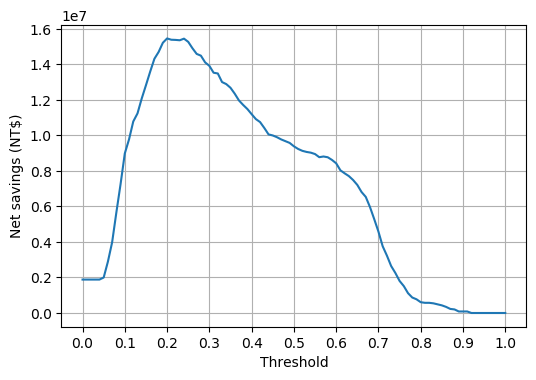

In [107]:
mpl.rcParams['figure.dpi'] = 100
plt.plot(thresholds, net_savings)
plt.xlabel('Threshold')
plt.ylabel('Net savings (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

In [108]:
max_savings_ix = np.argmax(net_savings)

In [109]:

thresholds[max_savings_ix]

0.2

In [110]:
net_savings[max_savings_ix]


15446325.35991916

In [111]:
sum(y_test_all)

1285

In [112]:
cost_wo_couns=sum(y_test_all)*savings_per_default

In [113]:
cost_wo_couns

66308240.202088244

In [114]:

net_savings = savings_of_all_counselings - cost_of_all_counselings
net_savings

array([ 1880768.14146177,  1880768.14146177,  1880768.14146177,
        1880768.14146177,  1880768.14146177,  1994646.92111822,
        2888525.70077467,  3978177.15836982,  5656358.85321657,
        7257722.24291007,  8978919.05638262,  9769676.34435837,
       10775009.49680027, 11227660.68305827, 12066008.95412597,
       12813145.02175817, 13576659.86904681, 14302674.71633547,
       14686447.12293702, 15203068.07194342, 15446325.35991916,
       15373976.54617716, 15364218.71552711, 15344203.32556416,
       15434536.47800606, 15254869.63044796, 14894596.68117211,
       14576566.17258336, 14477247.86743011, 14099217.35884136,
       13906535.39265746, 13518247.32475581, 13476171.46028966,
       12993140.95170091, 12878049.96860896, 12670974.10414281,
       12339155.79898956, 11957595.05314921, 11704140.40902661,
       11474564.54456046, 11186367.45975076, 10909806.71391041,
       10740836.95116201, 10409018.64600876, 10048579.12051195,
        9987973.01879421,  9889866.91707

In [115]:
net_savings[max_savings_ix]

15446325.35991916

In [116]:

perc_w_couns=net_savings[max_savings_ix]/cost_wo_couns

In [117]:
perc_w_couns

0.2329472975431598

In [118]:
len(y_test_all)

5938

In [119]:
net_savings[max_savings_ix] 

15446325.35991916

In [120]:
net_savings[max_savings_ix]/len(y_test_all)

2601.2673223171373

In [121]:
cost_of_all_counselings

array([4.45350e+07, 4.45350e+07, 4.45350e+07, 4.45350e+07, 4.45350e+07,
       4.43850e+07, 4.34550e+07, 4.21125e+07, 3.98925e+07, 3.72075e+07,
       3.48000e+07, 3.27450e+07, 3.09450e+07, 2.90475e+07, 2.72700e+07,
       2.52225e+07, 2.31225e+07, 2.10600e+07, 1.92675e+07, 1.75950e+07,
       1.60875e+07, 1.47150e+07, 1.36050e+07, 1.25775e+07, 1.16925e+07,
       1.10775e+07, 1.04625e+07, 9.87750e+06, 9.43500e+06, 8.91000e+06,
       8.45250e+06, 8.01000e+06, 7.58250e+06, 7.16250e+06, 6.95250e+06,
       6.69000e+06, 6.48000e+06, 6.24750e+06, 6.06750e+06, 5.82750e+06,
       5.61000e+06, 5.27250e+06, 5.15250e+06, 4.94250e+06, 4.72500e+06,
       4.60500e+06, 4.52250e+06, 4.39500e+06, 4.31250e+06, 4.23000e+06,
       4.09500e+06, 4.02750e+06, 3.95250e+06, 3.87000e+06, 3.80250e+06,
       3.77250e+06, 3.66000e+06, 3.58500e+06, 3.55500e+06, 3.48750e+06,
       3.39000e+06, 3.27750e+06, 3.19500e+06, 3.09750e+06, 2.99250e+06,
       2.87250e+06, 2.69250e+06, 2.53500e+06, 2.20500e+06, 1.942

In [122]:
cost_of_couns_per_acc=cost_of_all_counselings/len(y_test_all)
cost_of_couns_per_acc

array([7.50000000e+03, 7.50000000e+03, 7.50000000e+03, 7.50000000e+03,
       7.50000000e+03, 7.47473897e+03, 7.31812058e+03, 7.09203436e+03,
       6.71817110e+03, 6.26599865e+03, 5.86055911e+03, 5.51448299e+03,
       5.21135062e+03, 4.89179859e+03, 4.59245537e+03, 4.24764230e+03,
       3.89398787e+03, 3.54664870e+03, 3.24477939e+03, 2.96311890e+03,
       2.70924554e+03, 2.47810711e+03, 2.29117548e+03, 2.11813742e+03,
       1.96909734e+03, 1.86552711e+03, 1.76195689e+03, 1.66343887e+03,
       1.58891883e+03, 1.50050522e+03, 1.42345908e+03, 1.34893904e+03,
       1.27694510e+03, 1.20621421e+03, 1.17084877e+03, 1.12664197e+03,
       1.09127652e+03, 1.05212193e+03, 1.02180869e+03, 9.81391041e+02,
       9.44762546e+02, 8.87925227e+02, 8.67716403e+02, 8.32350960e+02,
       7.95722465e+02, 7.75513641e+02, 7.61620074e+02, 7.40148198e+02,
       7.26254631e+02, 7.12361064e+02, 6.89626137e+02, 6.78258673e+02,
       6.65628158e+02, 6.51734591e+02, 6.40367127e+02, 6.35314921e+02,
      

In [123]:
net_savings_per_acc=net_savings/len(y_test_all)
net_savings_per_acc

array([ 316.73427778,  316.73427778,  316.73427778,  316.73427778,
        316.73427778,  335.91224674,  486.44757507,  669.95236753,
        952.56969573, 1222.25029352, 1512.11166325, 1645.28062384,
       1814.58563436, 1890.81520429, 2031.99881343, 2157.82166079,
       2286.40280718, 2408.66869591, 2473.29860609, 2560.3011236 ,
       2601.26732232, 2589.08328497, 2587.43999925, 2584.06927005,
       2599.2819936 , 2569.02486198, 2508.35242189, 2454.79389905,
       2438.06801405, 2374.40507896, 2341.95611193, 2276.56573337,
       2269.47986869, 2188.13421214, 2168.7520998 , 2133.8791014 ,
       2077.99861889, 2013.74116759, 1971.05766403, 1932.39551104,
       1883.86114176, 1837.28641191, 1808.83074287, 1752.95026036,
       1692.24976768, 1682.04328373, 1665.52154211, 1644.4119863 ,
       1627.89024469, 1611.36850307, 1579.3558754 , 1554.22496903,
       1536.44017588, 1526.00149596, 1519.11977466, 1505.92279571,
       1476.20407514, 1482.75152877, 1475.63761151, 1450.50670

Text(0.5, 1.0, 'Cost Of Counselings VS Savings ')

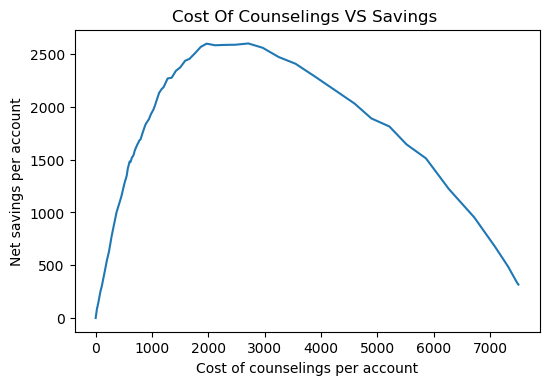

In [124]:
plt.plot(cost_of_couns_per_acc,net_savings_per_acc)
plt.xlabel('Cost of counselings per account')
plt.ylabel('Net savings per account')
plt.title('Cost Of Counselings VS Savings ')

In [125]:
thresholds


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [126]:
n_pos_pred

array([5.938e+03, 5.938e+03, 5.938e+03, 5.938e+03, 5.938e+03, 5.918e+03,
       5.794e+03, 5.615e+03, 5.319e+03, 4.961e+03, 4.640e+03, 4.366e+03,
       4.126e+03, 3.873e+03, 3.636e+03, 3.363e+03, 3.083e+03, 2.808e+03,
       2.569e+03, 2.346e+03, 2.145e+03, 1.962e+03, 1.814e+03, 1.677e+03,
       1.559e+03, 1.477e+03, 1.395e+03, 1.317e+03, 1.258e+03, 1.188e+03,
       1.127e+03, 1.068e+03, 1.011e+03, 9.550e+02, 9.270e+02, 8.920e+02,
       8.640e+02, 8.330e+02, 8.090e+02, 7.770e+02, 7.480e+02, 7.030e+02,
       6.870e+02, 6.590e+02, 6.300e+02, 6.140e+02, 6.030e+02, 5.860e+02,
       5.750e+02, 5.640e+02, 5.460e+02, 5.370e+02, 5.270e+02, 5.160e+02,
       5.070e+02, 5.030e+02, 4.880e+02, 4.780e+02, 4.740e+02, 4.650e+02,
       4.520e+02, 4.370e+02, 4.260e+02, 4.130e+02, 3.990e+02, 3.830e+02,
       3.590e+02, 3.380e+02, 2.940e+02, 2.590e+02, 2.230e+02, 1.880e+02,
       1.570e+02, 1.290e+02, 1.090e+02, 8.700e+01, 6.800e+01, 4.900e+01,
       3.800e+01, 3.200e+01, 2.500e+01, 2.000e+01, 

In [127]:
sum(n_pos_pred)

133564.0

In [128]:
threshold_per_pred=thresholds/len(y_test_all)
threshold_per_pred


array([0.00000000e+00, 1.68406871e-06, 3.36813742e-06, 5.05220613e-06,
       6.73627484e-06, 8.42034355e-06, 1.01044123e-05, 1.17884810e-05,
       1.34725497e-05, 1.51566184e-05, 1.68406871e-05, 1.85247558e-05,
       2.02088245e-05, 2.18928932e-05, 2.35769619e-05, 2.52610307e-05,
       2.69450994e-05, 2.86291681e-05, 3.03132368e-05, 3.19973055e-05,
       3.36813742e-05, 3.53654429e-05, 3.70495116e-05, 3.87335803e-05,
       4.04176490e-05, 4.21017178e-05, 4.37857865e-05, 4.54698552e-05,
       4.71539239e-05, 4.88379926e-05, 5.05220613e-05, 5.22061300e-05,
       5.38901987e-05, 5.55742674e-05, 5.72583361e-05, 5.89424049e-05,
       6.06264736e-05, 6.23105423e-05, 6.39946110e-05, 6.56786797e-05,
       6.73627484e-05, 6.90468171e-05, 7.07308858e-05, 7.24149545e-05,
       7.40990232e-05, 7.57830920e-05, 7.74671607e-05, 7.91512294e-05,
       8.08352981e-05, 8.25193668e-05, 8.42034355e-05, 8.58875042e-05,
       8.75715729e-05, 8.92556416e-05, 9.09397103e-05, 9.26237791e-05,
      

In [129]:
n_pos_pred_per_pred=n_pos_pred/len(y_test_all)
n_pos_pred_per_pred

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.96631863e-01, 9.75749411e-01, 9.45604581e-01,
       8.95756147e-01, 8.35466487e-01, 7.81407881e-01, 7.35264399e-01,
       6.94846750e-01, 6.52239811e-01, 6.12327383e-01, 5.66352307e-01,
       5.19198383e-01, 4.72886494e-01, 4.32637252e-01, 3.95082519e-01,
       3.61232738e-01, 3.30414281e-01, 3.05490064e-01, 2.82418323e-01,
       2.62546312e-01, 2.48736948e-01, 2.34927585e-01, 2.21791849e-01,
       2.11855844e-01, 2.00067363e-01, 1.89794544e-01, 1.79858538e-01,
       1.70259347e-01, 1.60828562e-01, 1.56113169e-01, 1.50218929e-01,
       1.45503537e-01, 1.40282924e-01, 1.36241159e-01, 1.30852139e-01,
       1.25968340e-01, 1.18390030e-01, 1.15695520e-01, 1.10980128e-01,
       1.06096329e-01, 1.03401819e-01, 1.01549343e-01, 9.86864264e-02,
       9.68339508e-02, 9.49814752e-02, 9.19501516e-02, 9.04344897e-02,
       8.87504210e-02, 8.68979454e-02, 8.53822836e-02, 8.47086561e-02,
      

Text(0.5, 20.72222222222222, 'Threshold')

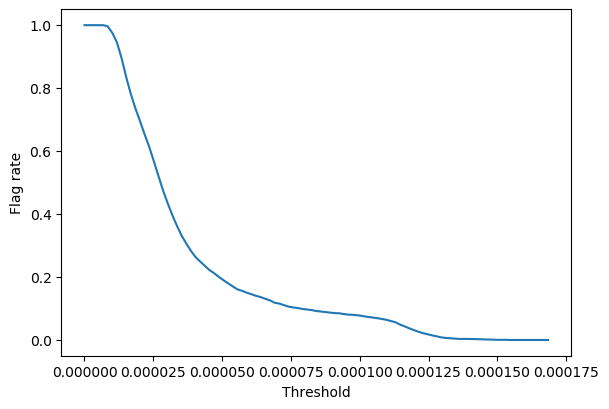

In [130]:
plt.plot(threshold_per_pred,n_pos_pred_per_pred)
plt.tight_layout()
plt.ylabel('Flag rate')
plt.xlabel('Threshold')

In [131]:
n_true_pos

array([1285., 1285., 1285., 1285., 1285., 1284., 1283., 1276., 1261.,
       1231., 1212., 1177., 1155., 1115., 1089., 1053., 1016.,  979.,
        940.,  908.,  873.,  833.,  802.,  773.,  751.,  729.,  702.,
        677.,  662.,  637.,  619.,  596.,  583.,  558.,  549.,  536.,
        521.,  504.,  492.,  479.,  465.,  448.,  440.,  425.,  409.,
        404.,  399.,  392.,  387.,  382.,  373.,  367.,  362.,  358.,
        355.,  352.,  344.,  343.,  341.,  335.,  327.,  313.,  306.,
        299.,  290.,  279.,  263.,  251.,  226.,  200.,  173.,  143.,
        122.,  100.,   85.,   68.,   56.,   41.,   32.,   28.,   22.,
         20.,   20.,   19.,   17.,   15.,   12.,    8.,    7.,    3.,
          3.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.])

In [132]:
n_true_pos/len(y_test_all)

array([0.21640283, 0.21640283, 0.21640283, 0.21640283, 0.21640283,
       0.21623442, 0.21606602, 0.21488717, 0.21236106, 0.20730886,
       0.20410913, 0.19821489, 0.19450994, 0.18777366, 0.18339508,
       0.17733244, 0.17110138, 0.16487033, 0.15830246, 0.15291344,
       0.1470192 , 0.14028292, 0.13506231, 0.13017851, 0.12647356,
       0.12276861, 0.11822162, 0.11401145, 0.11148535, 0.10727518,
       0.10424385, 0.1003705 , 0.09818121, 0.09397103, 0.09245537,
       0.09026608, 0.08773998, 0.08487706, 0.08285618, 0.08066689,
       0.0783092 , 0.07544628, 0.07409902, 0.07157292, 0.06887841,
       0.06803638, 0.06719434, 0.06601549, 0.06517346, 0.06433142,
       0.06281576, 0.06180532, 0.06096329, 0.06028966, 0.05978444,
       0.05927922, 0.05793196, 0.05776356, 0.05742674, 0.0564163 ,
       0.05506905, 0.05271135, 0.0515325 , 0.05035365, 0.04883799,
       0.04698552, 0.04429101, 0.04227012, 0.03805995, 0.03368137,
       0.02913439, 0.02408218, 0.02054564, 0.01684069, 0.01431

In [133]:
np.divide(n_true_pos,n_pos_pred)

C:\Users\Khush\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.21640283, 0.21640283, 0.21640283, 0.21640283, 0.21640283,
       0.21696519, 0.22143597, 0.22724844, 0.23707464, 0.24813546,
       0.2612069 , 0.26958314, 0.27993214, 0.28789052, 0.29950495,
       0.31311329, 0.32954914, 0.34864672, 0.36590113, 0.38704177,
       0.40699301, 0.42456677, 0.44211687, 0.46094216, 0.48171905,
       0.49356804, 0.50322581, 0.51404708, 0.52623211, 0.53619529,
       0.54924579, 0.55805243, 0.57665678, 0.58429319, 0.59223301,
       0.60089686, 0.60300926, 0.60504202, 0.60815822, 0.61647362,
       0.62165775, 0.63726885, 0.64046579, 0.64491654, 0.64920635,
       0.65798046, 0.66169154, 0.66894198, 0.67304348, 0.67730496,
       0.68315018, 0.68342644, 0.68690702, 0.69379845, 0.70019724,
       0.69980119, 0.70491803, 0.71757322, 0.71940928, 0.72043011,
       0.72345133, 0.71624714, 0.71830986, 0.72397094, 0.72681704,
       0.72845953, 0.73259053, 0.74260355, 0.76870748, 0.77220077,
       0.77578475, 0.7606383 , 0.77707006, 0.7751938 , 0.77981

C:\Users\Khush\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Precision VS Recall')

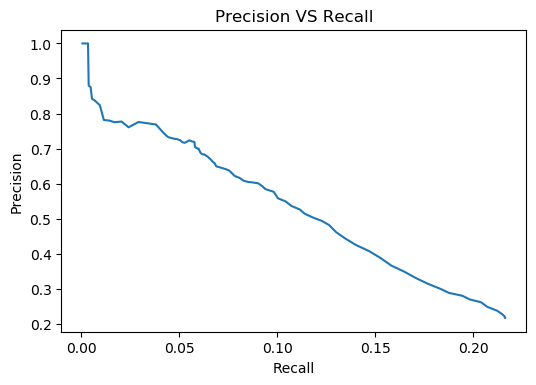

In [134]:
plt.plot(n_true_pos/len(y_test_all), np.divide(n_true_pos,n_pos_pred))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision VS Recall')

In [135]:

thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

C:\Users\Khush\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


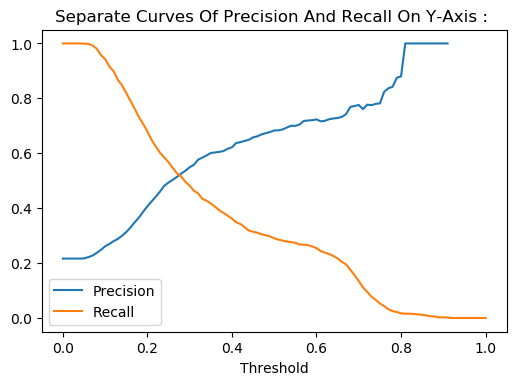

In [136]:
plt.plot(thresholds, np.divide(n_true_pos, n_pos_pred), label='Precision')
plt.plot(thresholds, n_true_pos/sum(y_test_all), label='Recall')
plt.xlabel('Threshold')
plt.title('Separate Curves Of Precision And Recall On Y-Axis : ')
plt.legend()